In [48]:
import pandas as pd
import numpy as np
import datanoutlibD1 # TODO: kan vi finde på et bedre navn til modulet?

# TODO: Kan alle nedenstående loades og udstilles af datanoutlib, 
# for at minimere antal biblioteker elever skal overskue?

%matplotlib inline  
import matplotlib.pyplot as plot
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

Del 1: På opdagelse i huspris-datasættet
---------------------------------------

(Jeg tænker måske vi skal lave 2-3 forskellige Notebooks, med hver sin del - den første mest datavisualisering fx)

In [2]:
# Dette skal eleverne skrive
housing = datanoutlibD1.download_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [3]:
# Dette skal eleverne skrive
housing["median_income"]

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

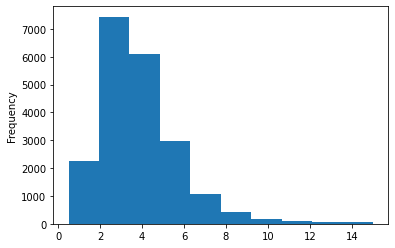

In [4]:
# Dette skal eleverne skrive
housing["median_income"].plot.hist()

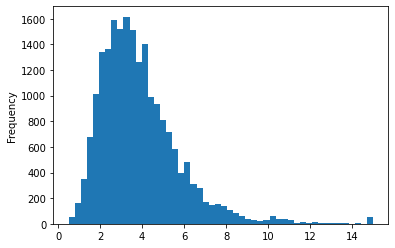

In [5]:
# Dette skal eleverne skrive - ændr antal bins
housing["median_income"].plot.hist(bins=50)

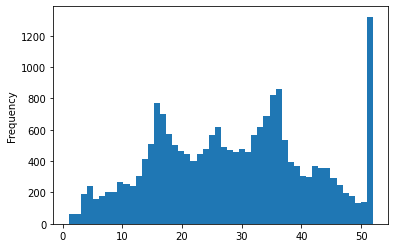

In [6]:
# Dette skal eleverne skrive - kig på andre features
housing["housing_median_age"].plot.hist(bins=50)

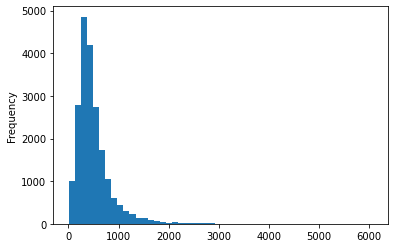

In [7]:
# Dette skal eleverne skrive - kig på andre features
housing["households"].plot.hist(bins=50)

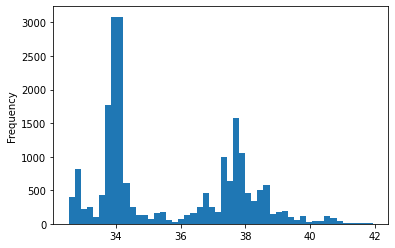

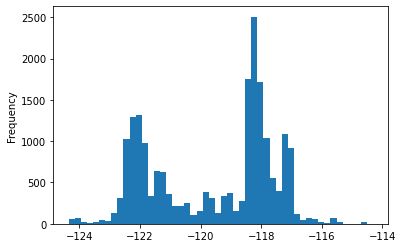

In [8]:
# Dette skal eleverne skrive - kig på andre features
housing["latitude"].plot.hist(bins=50)
plot.show() # hvis elever laver flere plots i samme celle skal de adskilles på denne måde, måske
            # skal vi bare få dem til altid at skrive plot.show() ??
housing["longitude"].plot.hist(bins=50)
plot.show()

Eksempel på opgaver: 
 - Hvad kan vi se ud fra histogram over median indkomst?
 - Hvad kan vi se ud fra histogram over huses alder?
 - Kan vi sige noget om sammenhængen mellem huspris og features ind til videre? (Nej, vi har bare set fordelinger)
 - Kan man se noget ud fra GPS-koordinater (latitude/longitude) på disse histogramer? (Leder videre til næste udforskning hvor plottes på kort)

Note: Nedenstående tænker jeg er faserne eleven går igennem ift. plotting af kortet, de retter bare i en enkelt celle, mens det her er præsenteret som en række celler, så man kan se forskellene i løbet af deres vej igennem

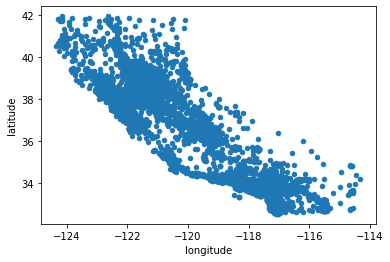

In [9]:
# de 3 plots er gode eksempler på hvordan man kan lære mere
# ved at visualisere ens data på forskellige måder
housing.plot.scatter(x="longitude", y="latitude")

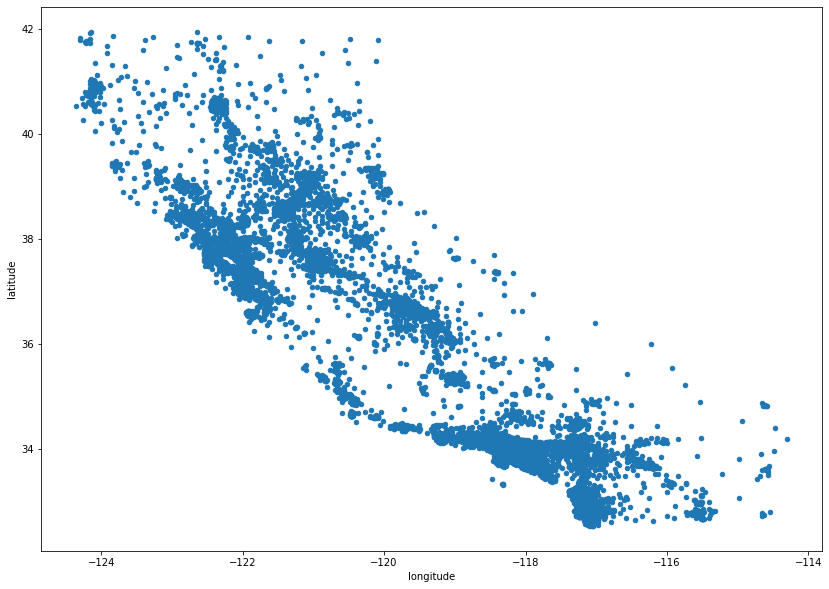

In [10]:
# ændr størrelsen på figuren
housing.plot.scatter(x="longitude", y="latitude", figsize=(14,10))

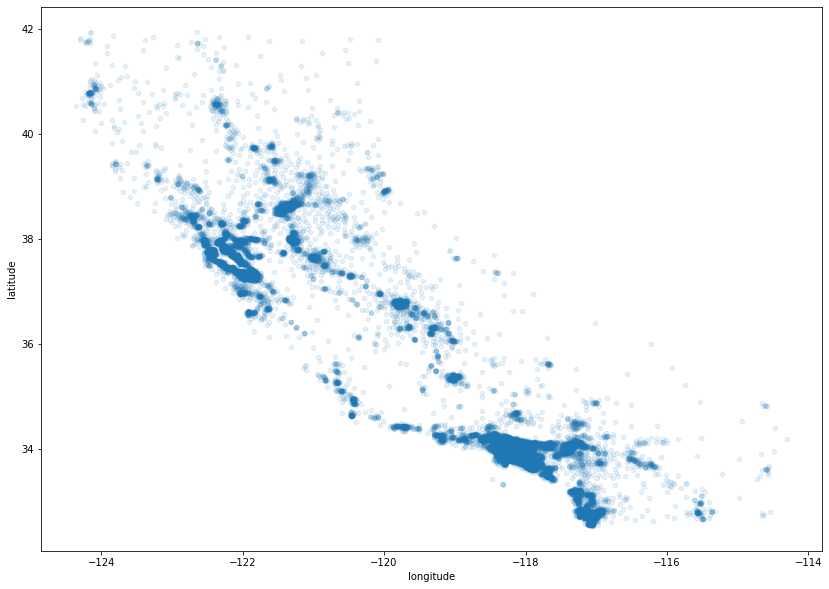

In [11]:
housing.plot.scatter(x="longitude", y="latitude", figsize=(14,10), alpha=0.1)

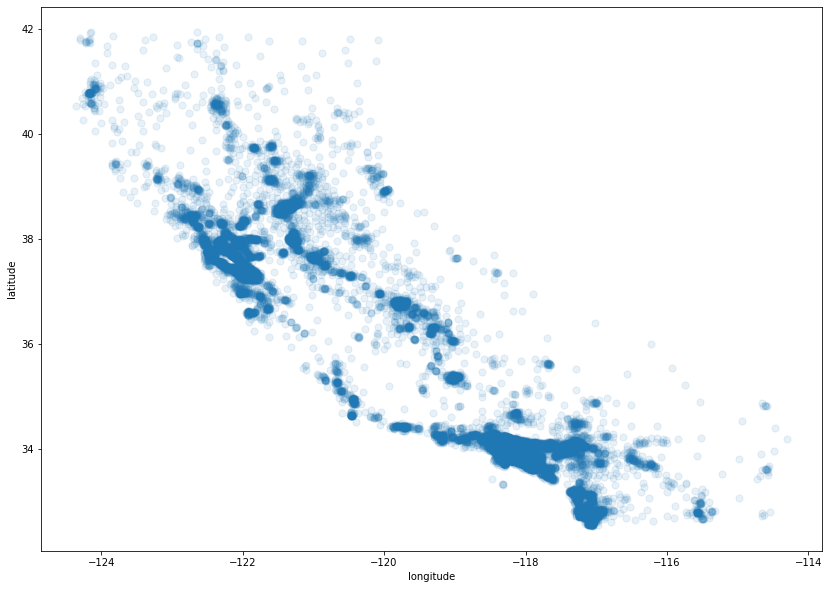

In [12]:
# Ændr størrelsen på punkter
housing.plot.scatter(x="longitude", y="latitude", figsize=(14,10), alpha=0.1, s=50)

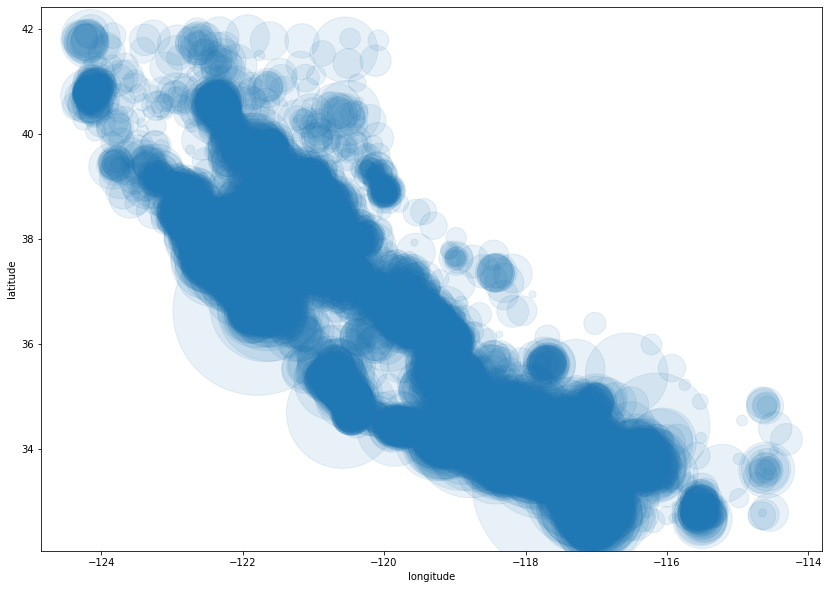

In [13]:
# Ændr størrelsen af punkter til at svare til befolkningen
housing.plot.scatter(x="longitude", y="latitude", figsize=(14,10), alpha=0.1, s=housing["population"])

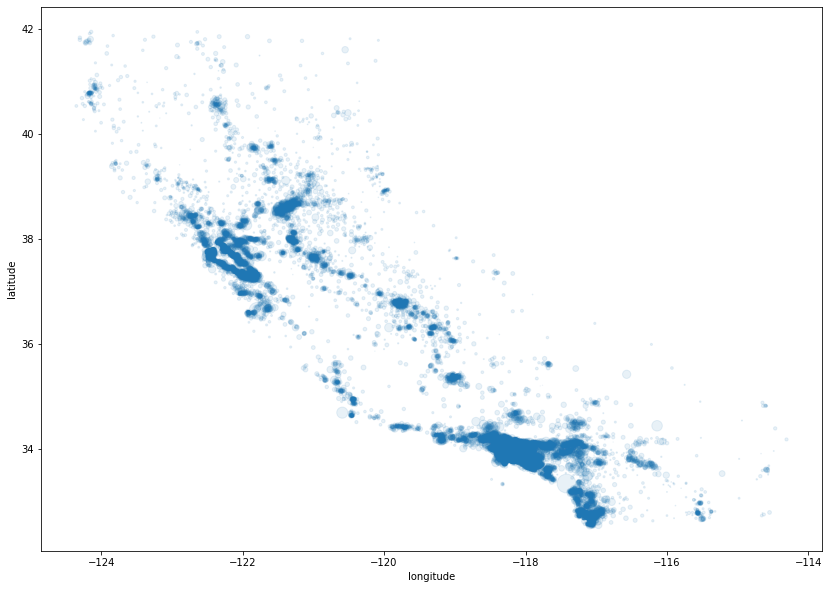

In [14]:
# Ændr størrelsen til at svare til befolkningen - skaler ned i størrelse
housing.plot.scatter(x="longitude", y="latitude", figsize=(14,10), alpha=0.1, s=housing["population"]/100)

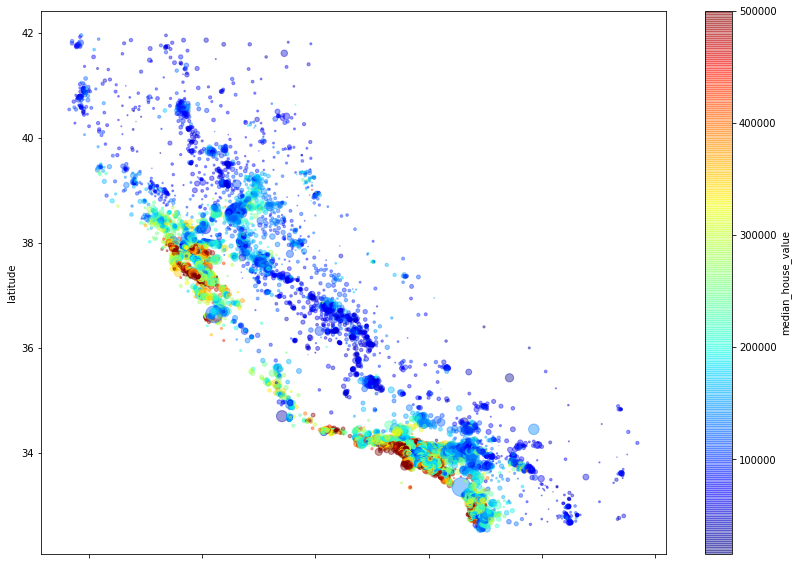

In [15]:
# Vis huspris i plottet
housing.plot.scatter(x="longitude", y="latitude", figsize=(14,10), alpha=0.4,
    s=housing["population"]/100,
    c="median_house_value", colormap="jet", 
)

Idéer til opgaver:
 - Vis et kort over median indkomsten - hvad kan man se af forskelle mellem fordeling af median indkomst og huspriser?
 - Vis et kort over husenes alder - hvad kan man se af forskelle mellem husenes alder og huspriser?

Del 2: Find sammenhænge i data
---------------------------------------
 - correlation matrix
 - scatter matrix af sammenhænge i data

In [16]:
# TODO: Jeg tænker correlation matrix måske skal skubbes længere ned efter scatter plots af sammenhænge
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


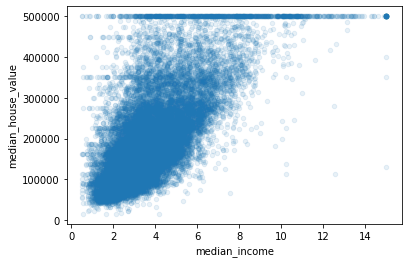

In [17]:
housing.plot.scatter(x="median_income", y="median_house_value", alpha=0.1)

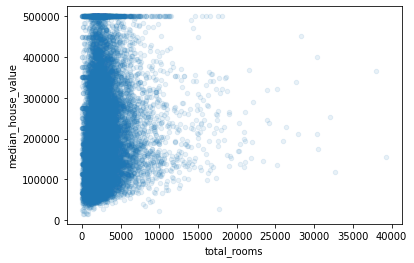

In [18]:
housing.plot.scatter(x="total_rooms", y="median_house_value", alpha=0.1)

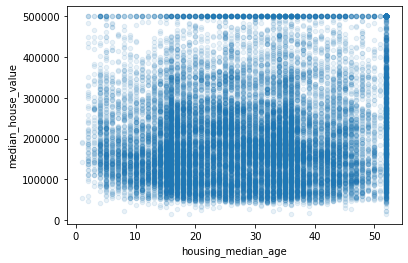

In [19]:
housing.plot.scatter(x="housing_median_age", y="median_house_value", alpha=0.1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12812b3d0>,
      dtype=object)

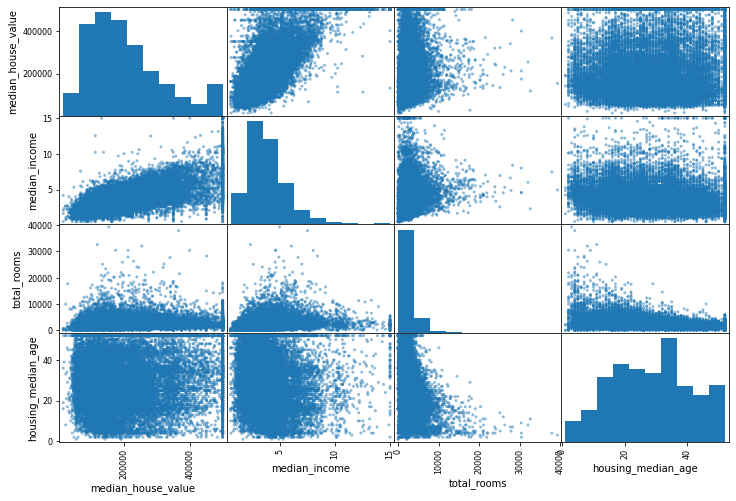

In [20]:
# Jeg tror det her rer for meget data at overskue for en gymnasieelev på en gang
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [21]:
# TODO: Jeg foreslår at dette sker tidligere, så de også kan blive plottet som histogrammer og på kortet
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

(0.0, 20.0)

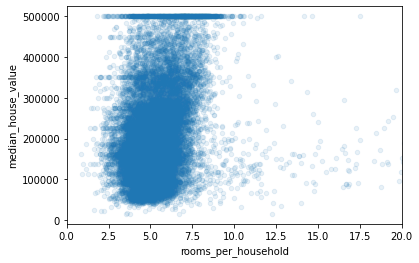

In [22]:
ax = housing.plot.scatter(x="rooms_per_household", y="median_house_value", alpha=0.1)
ax.set_xlim(0, 20) # changing axis

(0.0, 10.0)

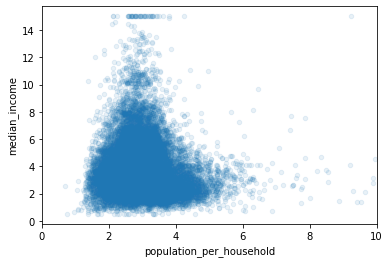

In [23]:
# Dem med lave indkomster lever både færre og flere sammen, mens de rige har meget mindre spredning
ax = housing.plot.scatter(x="population_per_household", y="median_income", alpha=0.1)
ax.set_xlim(0, 10) # changing axis

Del 3: Forbered træning og testsæt
------------------------------------------

In [24]:
housing_with_id = housing.reset_index()
train_set, test_set = datanoutlibD1.split_train_test_by_id(housing_with_id,0.2,"index")
print(len(train_set))
print(len(test_set))

16512
4128


In [25]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing["income_cat"] = pd.cut(housing["median_income"], ### <-- nødvendigt?
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# Det her er nok for meget for en gymnasieelev
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
housing = strat_train_set.copy() # TODO: Jeg synes det er noget rod at overskrive den tidligere variable, kald den hellere housing_train_set

In [26]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [28]:


imputer = SimpleImputer(strategy="median")

In [29]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,6.052381,0.185681,2.728571,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,4.635659,0.245819,4.077519,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,6.346405,0.179609,2.742484,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,5.505618,0.193878,3.808989,3


In [30]:


attr_adder = datanoutlibD1.CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)

In [46]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', datanoutlibD1.CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_prepared = num_pipeline.fit_transform(housing)

In [47]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

Del 4: Træning m. lineær regression
------------------------------------------


In [32]:


lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
acc = datanoutlibD1.CalculateAccuracy(housing_prepared, housing_labels,lin_reg)
acc

[196706.54479576 327111.89021295 195491.51550874 ...  96218.18987891
 202528.7964513  281752.62222204]


68390.37832942187

In [33]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [196706.54479576 327111.89021295 195491.51550874  64871.98233427
 184655.96851401]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [34]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
acc = datanoutlibD1.CalculateAccuracy(housing_prepared, housing_labels,tree_reg)
print(acc)

[286600. 340600. 196900. ...  97800. 225900. 500001.]
0


In [35]:
tree_cross_val = datanoutlibD1.cross_validate(tree_reg, housing_prepared, housing_labels)
datanoutlibD1.display_scores(tree_cross_val)

Scores: [71275.15038492 74639.76902605 73632.52695048 72135.40760241
 77581.67843948 76535.04595858 71628.63484596 71196.0047652
 73179.35011426 75522.00183094]
Mean: 73732.5569918272
Standard deviation: 2155.485784954737


In [36]:

lin_scores = datanoutlibD1.cross_validate(lin_reg, housing_prepared, housing_labels)

In [37]:

datanoutlibD1.display_scores(lin_scores)

Scores: [66483.58237633 67264.47029357 68168.12305068 74145.79195782
 68157.20132322 71108.28515763 64572.66848791 68166.74448271
 71164.94362886 67967.53047651]
Mean: 68719.93412352176
Standard deviation: 2587.179456908753


In [38]:

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_accuracy = datanoutlibD1.CalculateAccuracy(housing_prepared, housing_labels,forest_reg)
print(forest_accuracy)



[258206.01 321181.   213926.   ... 104648.   205895.   470209.71]
19061.91304347563


In [39]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [41]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [42]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

67240.15951127939 {'max_features': 2, 'n_estimators': 3}
60869.76521141375 {'max_features': 2, 'n_estimators': 10}
57647.90106337652 {'max_features': 2, 'n_estimators': 30}
64464.312485684306 {'max_features': 4, 'n_estimators': 3}
57945.994829661395 {'max_features': 4, 'n_estimators': 10}
55206.61200578451 {'max_features': 4, 'n_estimators': 30}
64822.734428961776 {'max_features': 6, 'n_estimators': 3}
56230.85877493879 {'max_features': 6, 'n_estimators': 10}
54069.99356847728 {'max_features': 6, 'n_estimators': 30}
63113.22889293701 {'max_features': 8, 'n_estimators': 3}
55867.87595477933 {'max_features': 8, 'n_estimators': 10}
53504.184500417636 {'max_features': 8, 'n_estimators': 30}
67514.04445563983 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
59146.43418893442 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
65052.37692566026 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
56780.99472490117 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [43]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.076526  , 0.07685286, 0.05056579, 0.01499468, 0.01386968,
       0.01455717, 0.01453762, 0.32965978, 0.02859517, 0.04774081,
       0.07251734, 0.13781911, 0.02765918, 0.06853884, 0.02556597])

In [44]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.07685286381409663, 'median_income'),
 (0.07652599777268841, 'median_house_value'),
 (0.050565793375495584, 'total_rooms'),
 (0.014994677887436145, 'housing_median_age')]

In [45]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = num_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

NameError: name 'mean_squared_error' is not defined

In [ ]:

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                          loc=squared_errors.mean(),
                          scale=stats.sem(squared_errors)))